# Bike-sharing-analysis
A data analysis project to explore bike sharing, and what factors impact bike sharing in Washington, D.C., USA, for the period between January 1, 2011, and December 31, 2012. 

Data source: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset# 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load data
hourly_data = pd.read_csv('data/hour.csv')

In [3]:
# head
hourly_data.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [4]:
# generic statistics
print(f"shape of data is: {hourly_data.shape[0]} rows and {hourly_data.shape[1]} columns.")
print(f"Missing values in data: {hourly_data.isnull().sum().sum()}")

shape of data is: 17379 rows and 17 columns.
Missing values in data: 0


In [5]:
# stats on the numerical columns
hourly_data.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


- `temporal features`: This contains information about the time at which the
record was registered. This group contains the dteday, season, yr, mnth, hr,
holiday, weekday, and workingday columns.
- `weather related features`: This contains information about the weather
conditions. The weathersit, temp, atemp, hum, and windspeed columns
are included in this group.
- `record related features`: This contains information about the number
of records for the specific hour and date. This group includes the casual,
registered, and cnt columns.

## Data Preprocessing
Goal: Encode the temporal features into more human readable form
- seasons from 1-4, to Winter, Spring, Summer & Fall seasons.
- yr from 0 & 1 to 2011 and 2012
- weekday from 0-6 to Sunday (0), Monday(1) throuhg Saturday(6)
- scale hum column to 0-100 as it represents percentages
- scale windspeed to values between 0 (min) and 67(max)

In [6]:
# copy of dataset
hourly_data_clean = hourly_data.copy()

In [7]:
# seasons mapping using dictionary, apply and lambda functions
seasons_map = {1: 'winter',
               2: 'spring',
               3: 'summer',
               4: 'fall'}
hourly_data_clean.season = hourly_data_clean['season'].apply(lambda x: seasons_map[x])

In [8]:
# transform yr column
yr_map = {0: 2011, 1: 2012}
hourly_data_clean.yr = hourly_data_clean['yr'].apply(lambda x: yr_map[x])

In [9]:
# transfrom weekdays
day_map = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
hourly_data_clean.weekday = hourly_data_clean['weekday'].apply(lambda x: day_map[x])

Transforming weather related columns
weathersit column represents the current weather conditions, where
1 stands for clear weather with a few clouds, 2 represents cloudy weather,
3 relates to light snow or rain, and 4 stands for heavy snow or rain. The hum
column stands for the current normalized air humidity, with values from 0 to
1 (hence, we will multiply the values of this column by 100, in order to obtain
percentages). Finally, the windspeed column represents the windspeed, which
is again normalized to values between 0 and 67 m/s.

In [10]:
# transfrom weathersit
weather_map = {1: 'clear', 2: 'cloudy', 3: 'light_rain_snow', 4: 'heavy_rain_snow'}
hourly_data_clean.weathersit = hourly_data_clean['weathersit'].apply(lambda x: weather_map[x])

In [11]:
# rescale hum and windspeed columns
hourly_data_clean.hum = hourly_data_clean['hum']*100
hourly_data_clean.windspeed = hourly_data_clean['windspeed']*67

#### Test

In [12]:
# visualize the changes in the columns
cols = ['season', 'yr', 'weekday', 'weathersit', 'hum', 'windspeed']
hourly_data_clean[cols].sample(15, random_state=1083)

,season,yr,weekday,weathersit,hum,windspeed
10653,spring,2012,Sunday,cloudy,94.0,19.0012
13136,summer,2012,Friday,clear,27.0,7.0015
4916,summer,2011,Thursday,clear,56.0,15.0013
4329,summer,2011,Monday,clear,83.0,8.9981
15536,fall,2012,Sunday,clear,41.0,30.0026
3208,spring,2011,Wednesday,cloudy,78.0,19.0012
2278,spring,2011,Saturday,cloudy,82.0,8.9981
12721,spring,2012,Tuesday,cloudy,78.0,7.0015
12927,summer,2012,Wednesday,clear,31.0,12.9980
10464,winter,2012,Saturday,cloudy,88.0,0.0000


## Analysis

#### 1. Registered vs. casual use

In [13]:
# assert that total number of rides is == to sum of regitered and causal users/rides
assert (hourly_data_clean.casual + hourly_data_clean.registered == hourly_data_clean.cnt).all(),\
'Sum of casual & registered not equal to total number of rides'

/home/tuf/.environments/DA.workshop.env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/tuf/.environments/DA.workshop.env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


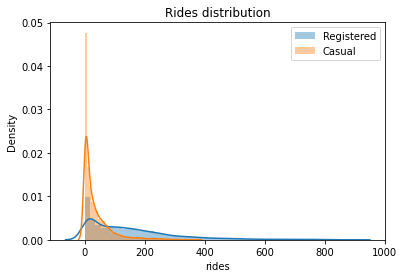

In [14]:
# ploting distribution of registered vs casual users/rides
sns.distplot(hourly_data_clean['registered'], label='Registered')
sns.distplot(hourly_data_clean['casual'], label = 'Casual')
plt.legend()
plt.xlabel('rides')
# plt.ylabel('frequncy')
plt.title('Rides distribution')
plt.savefig('figures/rides_distribution.png', format='png');

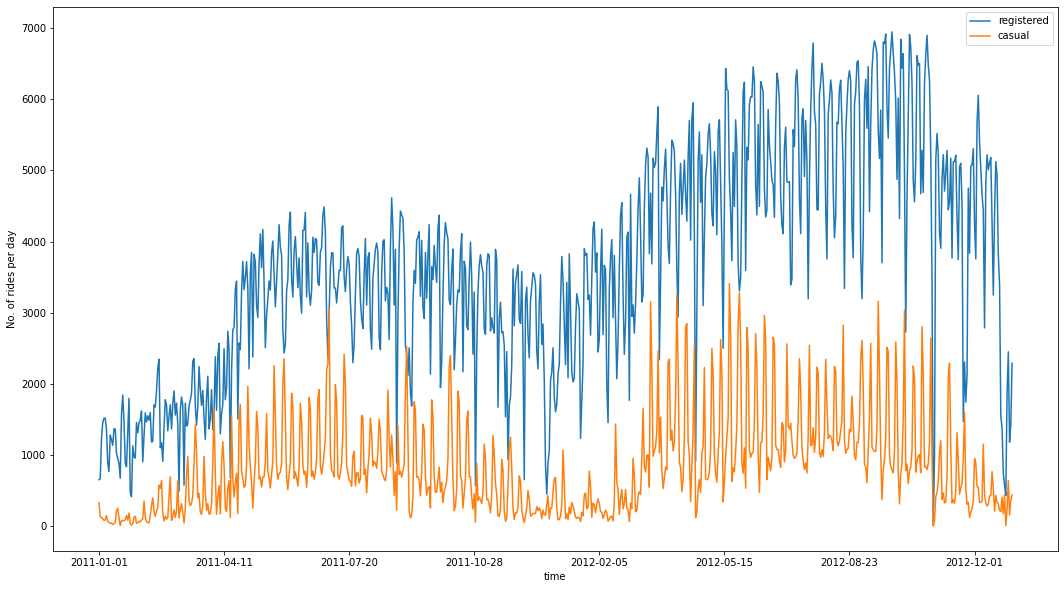

In [15]:
# evolution of rides over time
plot_data = hourly_data_clean[['registered', 'casual', 'dteday']]
ax = plot_data.groupby('dteday').sum().plot(figsize=(18,10))
ax.set_xlabel('time');
ax.set_ylabel('No. of rides per day');
plt.savefig('figures/rides_daily.png', format='png')

No. of registered rides is alwas higher than that of causl rides per day acording to the figure above. During winter, the total number of rides decrease. 

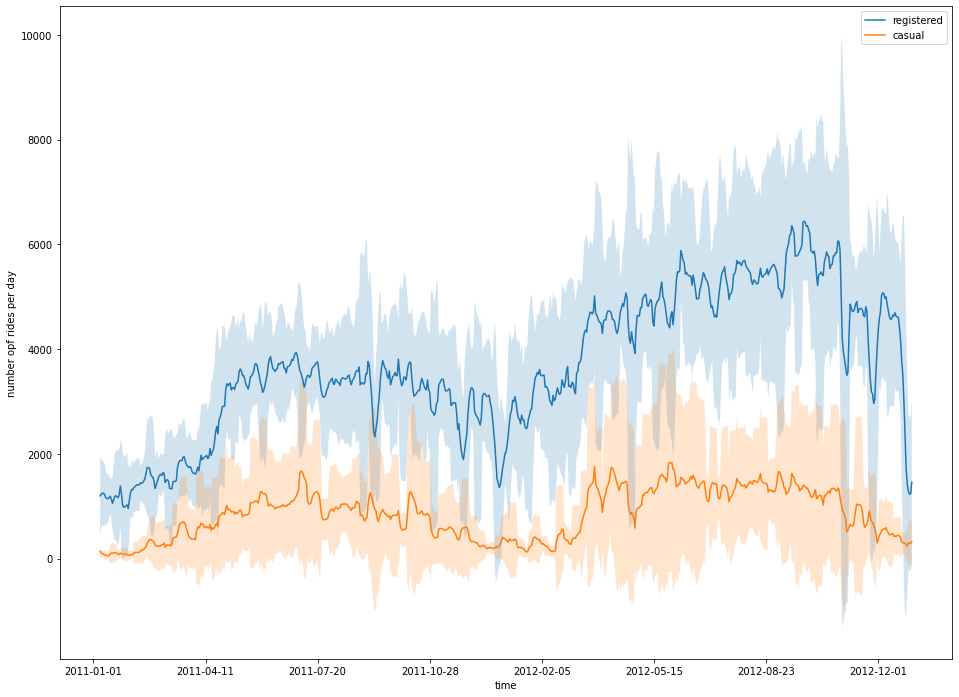

In [16]:
"""
    create new dataframe with necessary for platting columns and obtain number of rides per day, groupign each day.
"""
plot_data = hourly_data_clean[['registered', 'casual', 'dteday']]
plot_data = plot_data.groupby('dteday').sum()

# rolling mean and standard deviation window definition
window = 7
rolling_means = plot_data.rolling(window).mean()
rolling_deviations = plot_data.rolling(window).std()    

"""
    create a plot of series where we first plot the series of rollign eans then we color the zones between te series of rollign means +-2 rollign standard deviations
"""
ax = rolling_means.plot(figsize=(16,12))
ax.fill_between(rolling_means.index, rolling_means['registered']\
    + 2*rolling_deviations['registered'],\
        rolling_means['registered']\
            - 2*rolling_deviations['registered'],\
                alpha = 0.2)
ax.fill_between(rolling_means.index, rolling_means['casual']\
    + 2*rolling_deviations['casual'],\
        rolling_means['casual']\
            - 2*rolling_deviations['casual'],\
                alpha = 0.2)
ax.set_xlabel('time');
ax.set_ylabel("number opf rides per day");
plt.savefig('figures/rides_aggregated.png', format='png')

The rolling mean and std is the mean or std  at a certain time intance computed in a given window entries either wekly or monthy and nt for entries of the whole series.

#### next we focus on distribution of requests over separate hours and days of the week.

/home/tuf/.environments/DA.workshop.env/lib/python3.10/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


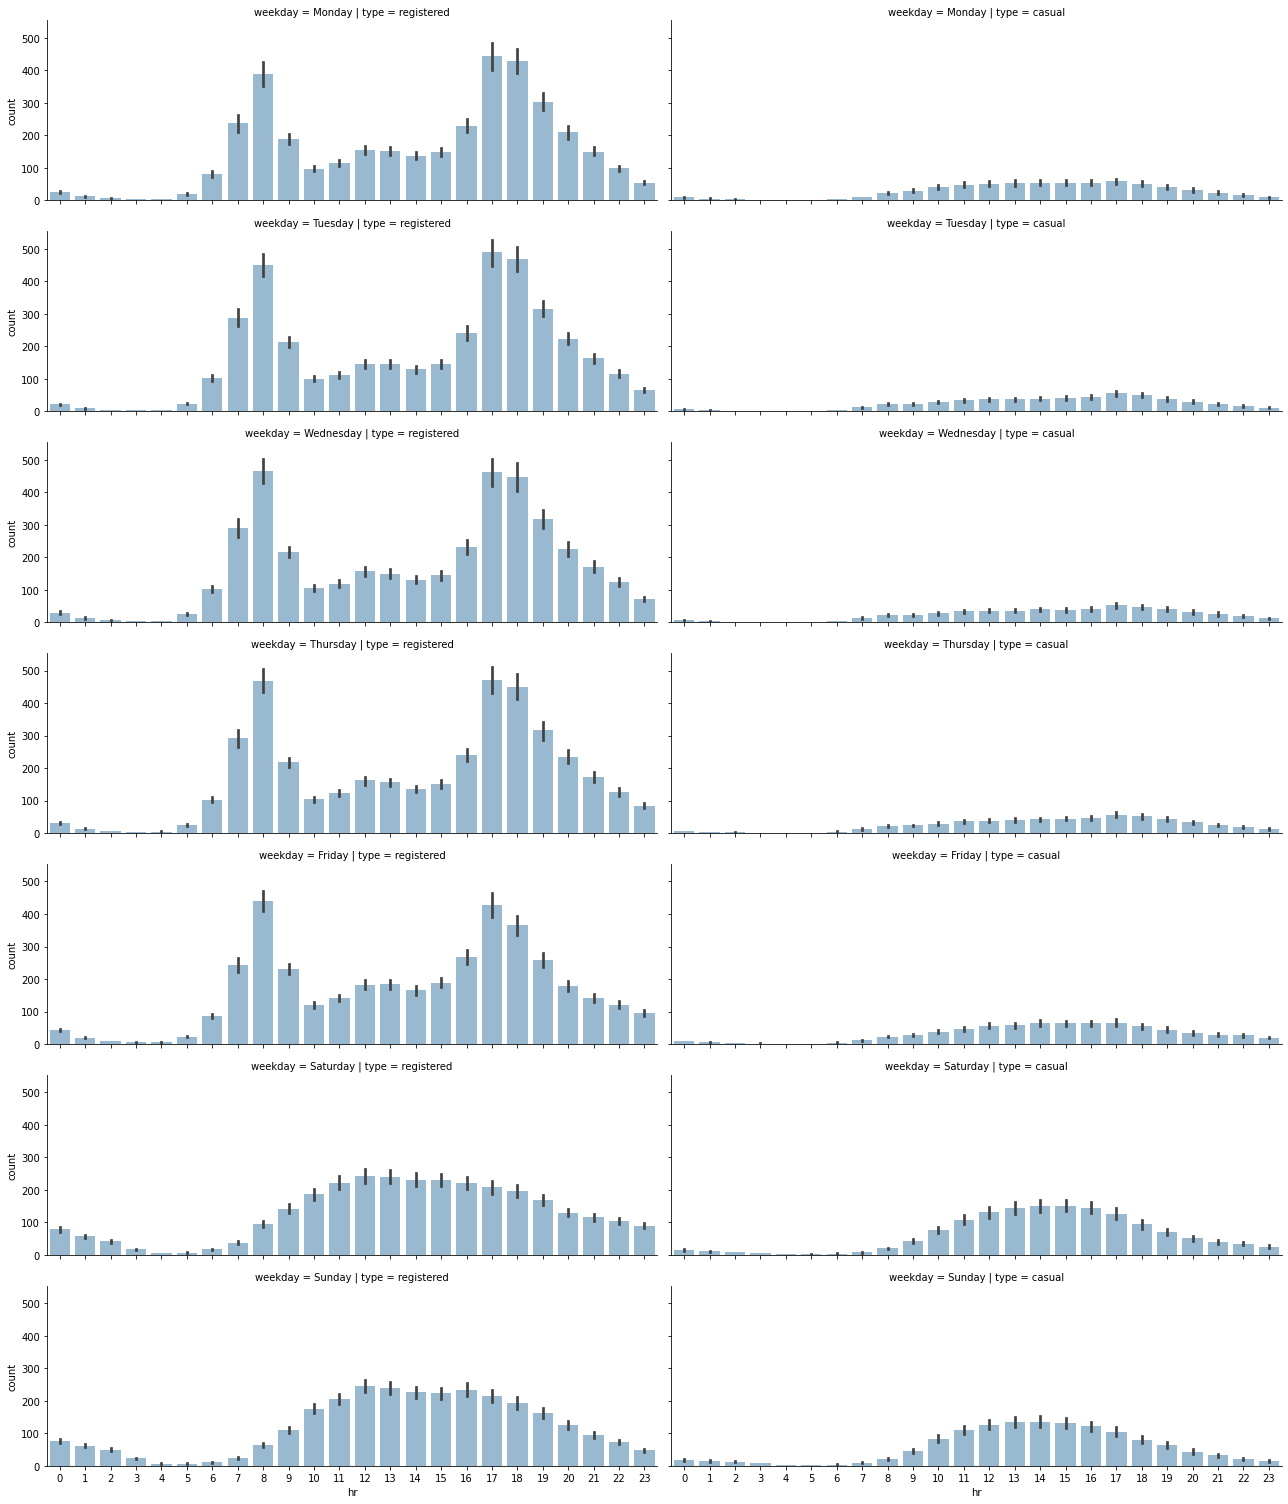

In [17]:
# columns needed
plot_data = hourly_data_clean[['hr', 'weekday', 'registered', 'casual']]

'''
transform the data into a format, in number of entries are computer as count, for each distinct hr,
weekday and type (registered or casual)
'''
plot_data = plot_data.melt(id_vars=['hr', 'weekday'],\
    var_name='type', value_name='count')

""" 
    create FaceGrid object, in which a grid plot is produced.
    as columns we have the various days of the weeks,
    as rows, the differnt types (registered adn casual)
"""
grid = sns.FacetGrid(plot_data, row='weekday', \
    col='type', height=3, aspect=3, \
        row_order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# populate the faceGrid with the specific plots
grid.map(sns.barplot, 'hr', 'count', alpha=0.5)
grid.savefig('figures/weekday_hour_distributions.png', format='png');

##### Conclusion: 
- most bike sharing service usage occurs durign workign days from 8am to 6pm.
- usage patterns for weekends for both registered and casual users is concentrated between 11am and 6 pm

#### 2. Seasonal impact on rides

This section aims to investigate the impact of seasons on the total number of rides. Different plots will be used to show the distribution of rides over hours adn weekdays based on the season.

In [18]:
# select data subset by combining hours and seasons 
plot_data = hourly_data_clean[['hr', 'season', 'registered', 'casual']]

In [19]:
# unpivot data from wide to long
plot_data = plot_data.melt(id_vars=['hr', 'season'], var_name= 'type', value_name= 'count')

/home/tuf/.environments/DA.workshop.env/lib/python3.10/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


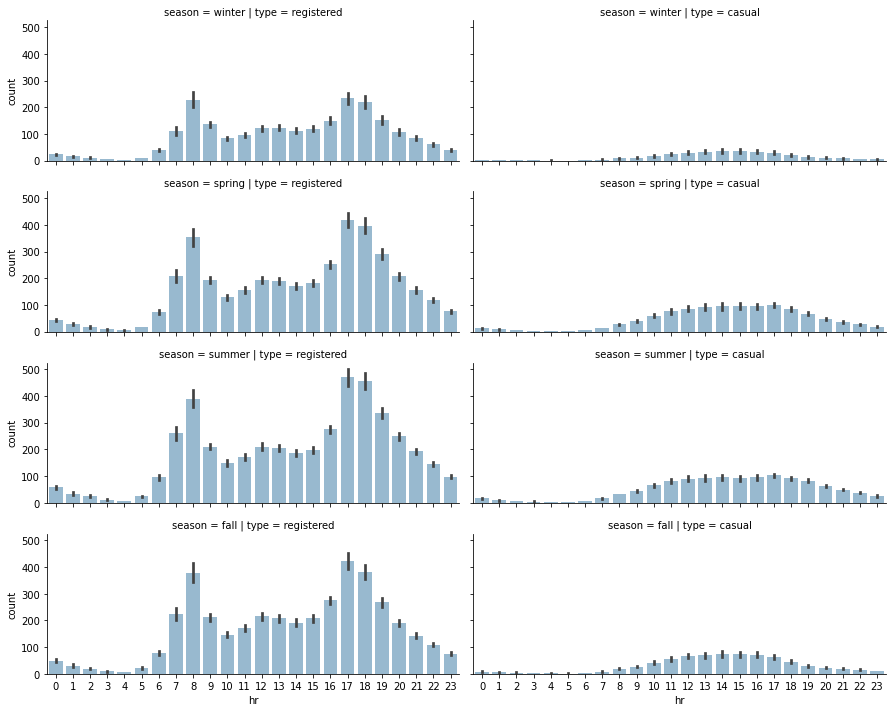

In [20]:
# Facegrid object where rows represent hte different seasons
grid = sns.FacetGrid(plot_data, row='season', col = 'type', height=2.5, aspect = 2.5, row_order=['winter', 'spring', 'summer','fall'])

# applyiung plotting function to each element in the grid
grid.map(sns.barplot, 'hr', 'count', alpha=0.5);

# save figure
grid.savefig('figures/hr_season_weekday.png', format='png')

A few things are noticeable from this analysis:
- There are fewer rides both regiasstered adn casual durign winter. This is durign poor weather so the outcome is expected.


Distribution of rides on weekday basis

In [21]:
# subset of teh data
plot_data = hourly_data_clean[['weekday', 'season', 'registered', 'casual']]

In [22]:
# unpivot the data
plot_data = plot_data.melt(id_vars=['weekday', 'season'], var_name='type', value_name='count')

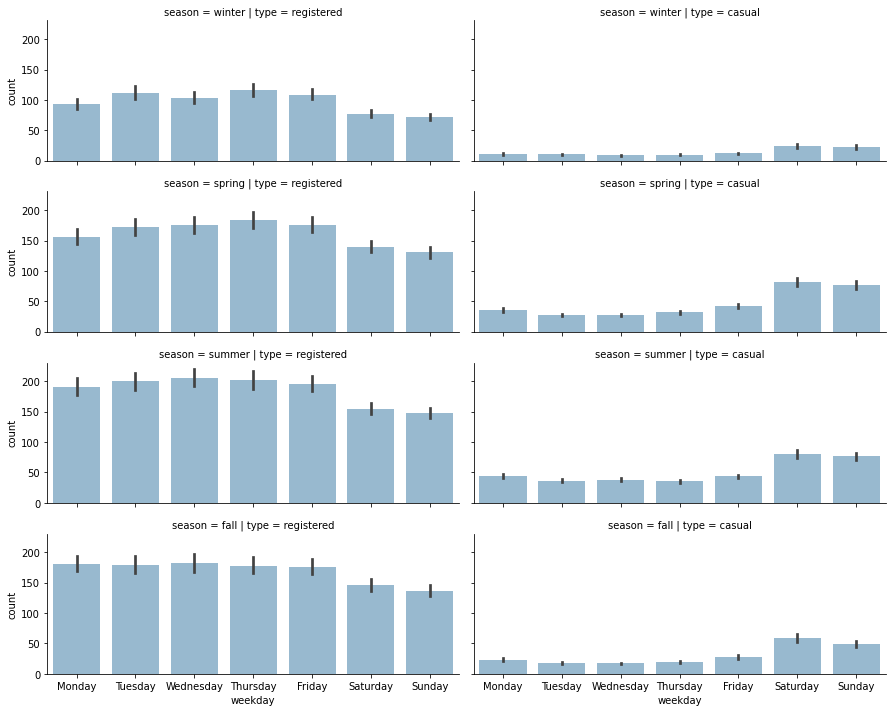

In [23]:
# Facegrid plot object
grid = sns.FacetGrid(plot_data, row='season', col='type', height=2.5, aspect=2.5, row_order=['winter', 'spring', 'summer', 'fall'])

# plot
grid.map(sns.barplot, 'weekday', 'count', alpha=0.5, order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);

From this analysis some insights are visible and some conclusion can be assumed:
- Casual rides increase over the weekend compared ot the rest fo the week while registered rides decrease over the weekend compared ot the rest of teh week.
  - this might enforce the earlier hypotheis that registered customers mainly use the bike sharing service for comunting to work while casual users use the service occassionally over the weekned.
    - this cannot however be ascertained without statistical tests

### Hypotheis tests
a hypotheis tries to answer the question: "is a certain hypotheical value ion line with the value obtained by direct measurements or not?

- define null and alternative hypotheis (The two complement each other)
- identifying the appropriate test statistic 
  - a quantity whose calculation is based on the sample and whose value is the basis for accepting or rejecting the null hypotheis. it is computed as:
  
  test statistic = (sample statistic - value under null hypothesis) / (standard error of sample statistic)

- specifying the significance level i.e. the probability of rejecting a tru null hypotheis.
  - generally 5%. more conservatives ones are 1% and 0.5%
- Two-sided tests which is a test that the null hypotheis assumes the value is equal to. Split between two tails +&-
- One-sided tests ehich are tests assuming that the value is greater than or less than a predefined value.
  - P-value is the smallest level of significnace at whcih the null hypootheis can eb rejected. 


### Estimating avergage registered rides

In [24]:
# Population mean of registered rides
pop_mean = hourly_data_clean.registered.mean()
pop_mean

153.78686920996606

In [25]:
# Sample of the data for summer 2011
sample = hourly_data_clean[(hourly_data_clean.season == "summer") & (hourly_data_clean.yr == 2011)].registered
sample

4010     23
4011     12
4012      5
4013      2
4014      7
       ... 
6245    388
6246    250
6247    194
6248    166
6249     99
Name: registered, Length: 2240, dtype: int64

In [26]:
# T-test and p-value for the sample
from scipy.stats import ttest_1samp
test_result = ttest_1samp(sample, pop_mean)
print(f"Test statistics: {test_result[0]}, \n p-value: {test_result[1]}")

Test statistics: -3.491969148378619, 
 p-value: 0.0004887645279519517


In [27]:
# 5% sample of the whole data
import random 
random.seed(111)
sample_unbiased = hourly_data_clean.registered.sample(frac=0.05)
test_result_unbiased = ttest_1samp(sample_unbiased, pop_mean)
print(f"unbiased test statistic: {test_result_unbiased[0]}, \n p-value: {test_result_unbiased[1]}")

unbiased test statistic: -1.8182000747698095, 
 p-value: 0.06937811778120104


### Hypothesis testing on registered rides
- formulate the null hypotheis:
  - H_0: average registered rides over weekdays - average registered rides over weekend = 0
  - H_a: average registered rides over weekdays - avergage refistered rides over weekend != 0
- once null hypotheis is established, collect data for the two groups.

In [30]:
# define mask, indicate day is weekedn or work day
weekend_days = ['Saturday', 'Sunday']
weekend_mask = hourly_data_clean.weekday.isin(weekend_days)
workingdays_mask = ~hourly_data_clean.weekday.isin(weekend_days)

# Select registered rides for the weekend and workign days
weekend_data = hourly_data_clean.registered[weekend_mask]
workingdays_data = hourly_data_clean.registered[workingdays_mask]

In [31]:
# Perfom ttest
from scipy.stats import ttest_ind
test_res = ttest_ind(weekend_data, workingdays_data)
print(f"statistic value: {test_res[0]:.03f}, \n p-value: {test_res[1]:.03f}")

statistic value: -16.004, 
 p-value: 0.000


- P-value from the test is less than 0.0001.
- this is below the standard critical 0.05 therefore we can reject the null hypotheis and confirm that inital obsrvation is correct: i.e.
 there is statistically significant difference between the number of rides perfomed durign workign dys and the weekend

/home/tuf/.environments/DA.workshop.env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/tuf/.environments/DA.workshop.env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


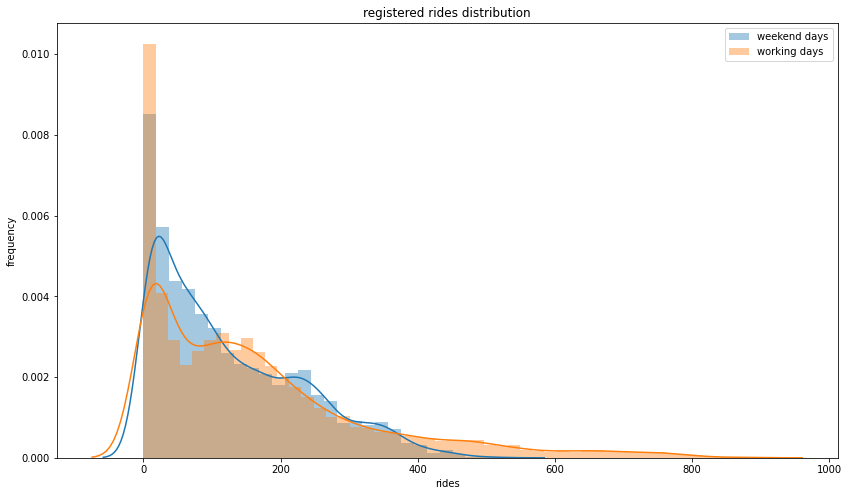

In [37]:
# plot the distributions of the two samples i.e. rides for workign days and weekends.
plt.figure(figsize=(14,8))
sns.distplot(weekend_data, label = 'weekend days')
sns.distplot(workingdays_data, label='working days')
plt.legend()

plt.xlabel('rides')
plt.ylabel('frequency')
plt.title('registered rides distribution')
plt.savefig('figures/1_04_a.png', format='png');

- Validating the second assumption, i.e. casual users perfom more rides durign the weekend.
- null hypothesis: the average number of rides durign working days is the same as avergage of rides durign the weekend, both perfomed by casual customers.
- alternative hypothesis will then result in a statisscally significant difference in the average number o9f rides betwen the two groups.

Statistics vale: 41.077, 
 p-value: 0.000


/home/tuf/.environments/DA.workshop.env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/tuf/.environments/DA.workshop.env/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


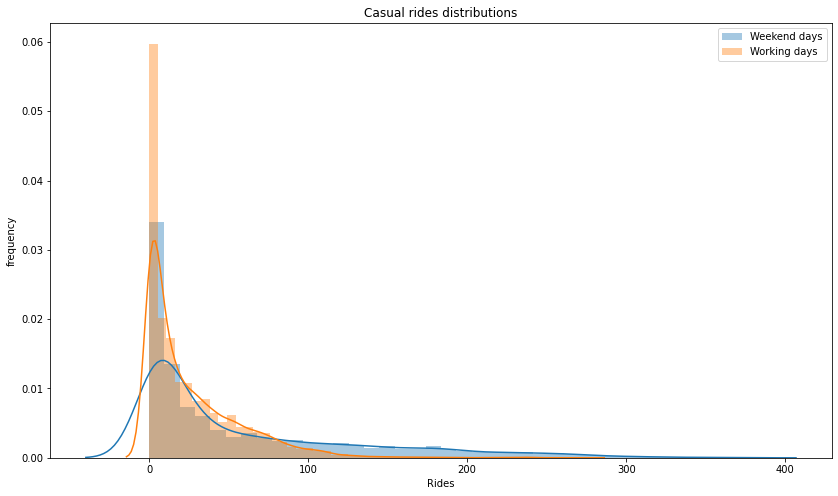

In [40]:
# select casual rides for the weekend and working days
weekend_casual_data = hourly_data_clean.casual[weekend_mask]
workingdays_casual_data = hourly_data_clean.casual[workingdays_mask]

#TTest
test_res = ttest_ind(weekend_casual_data, workingdays_casual_data)
print(f"Statistics vale: {test_res[0]:.03f}, \n p-value: {test_res[1]:.03f}")

# plotting the distributions of casuakl rides fro working vs weekend days
plt.figure(figsize=(14, 8))
sns.distplot(weekend_casual_data, label = 'Weekend days')
sns.distplot(workingdays_casual_data, label='Working days')
plt.legend()
plt.xlabel('Rides')
plt.ylabel('frequency')
plt.title("Casual rides distributions")
plt.savefig('figures/1_04_b.png', format='png');

There is a statistically significnat difference between teh number of rides on workign days and weekend days for both casual and registered customers

## Analysis of weather-related features

- the main assumption is that we find a strong dependency of those weather features on the current number of rides since bad weather is likey to significantly infleuce bike sharing services.
- The weather features in the data include the following:
  - Weathersit - categorical variable respresign the current weather situation:
    - Clear - clear weather or few clouds
    - cloudy - mist or cloudy weather
    - light_rain_snow - light rain or snow is present
    - heavy_rain_snow -  heavy rain or snow is present
  - temp - normalised temperature in celsius.
    - values are divided by 41 degrees celcius meanign the highest registered temperature in teh data is 41 degrees celcius correstpodnign to 1 in the dataset
  - atemp - normalised feeling temperature in celcius. 
    - values are divided by 50 meaning the highest registered temperarure in the data is 50 degrees celcious correstpoding to 1 in our dataset
  - hum - the humidity level as a percentage
  - windspeed - the wind speed in m/s



